In [4]:
import os
os.getcwd()

'C:\\Users\\jaiveer.karra.1\\Google Drive'

In [5]:
os.chdir("C:\\Users\\jaiveer.karra.1\\Downloads")

In [69]:
import numpy as np  # linear algebra
import pandas as pd  # read and wrangle dataframes
import matplotlib.pyplot as plt # visualization
import seaborn as sns # statistical visualizations and aesthetics
from sklearn.base import TransformerMixin # To create new classes for transformations
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) # preprocessing 
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox # data transform
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) # model selection modules
from sklearn.pipeline import Pipeline # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin # To create a box-cox transformation class
from collections import Counter
import warnings
# load models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
#from xgboost import (XGBClassifier, plot_importance)
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

%matplotlib inline 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [79]:
import pandas as pd
import numpy as np
df=pd.read_csv('glass.csv')
features = df.columns[:-1].tolist()
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [80]:
features[0:5]

['RI', 'Na', 'Mg', 'Al', 'Si']

In [8]:
X=df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
X[0:5]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [9]:
X=df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].values
X[0:5]

array([[1.52101e+00, 1.36400e+01, 4.49000e+00, 1.10000e+00, 7.17800e+01,
        6.00000e-02, 8.75000e+00, 0.00000e+00, 0.00000e+00],
       [1.51761e+00, 1.38900e+01, 3.60000e+00, 1.36000e+00, 7.27300e+01,
        4.80000e-01, 7.83000e+00, 0.00000e+00, 0.00000e+00],
       [1.51618e+00, 1.35300e+01, 3.55000e+00, 1.54000e+00, 7.29900e+01,
        3.90000e-01, 7.78000e+00, 0.00000e+00, 0.00000e+00],
       [1.51766e+00, 1.32100e+01, 3.69000e+00, 1.29000e+00, 7.26100e+01,
        5.70000e-01, 8.22000e+00, 0.00000e+00, 0.00000e+00],
       [1.51742e+00, 1.32700e+01, 3.62000e+00, 1.24000e+00, 7.30800e+01,
        5.50000e-01, 8.07000e+00, 0.00000e+00, 0.00000e+00]])

In [10]:
type(X)

numpy.ndarray

In [11]:
y=df[ 'Type'].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int64)

In [12]:
type(y)

numpy.ndarray

In [13]:
type(y)

numpy.ndarray

In [14]:
y[0:4]

array([1, 1, 1, 1], dtype=int64)

In [15]:
X.shape

(214, 9)

In [16]:
y.shape

(214,)

In [17]:
df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [18]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [19]:
df.describe?

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [21]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [22]:
df["Na"].mean

<bound method Series.mean of 0      13.64
1      13.89
2      13.53
3      13.21
4      13.27
       ...  
209    14.14
210    14.92
211    14.36
212    14.38
213    14.23
Name: Na, Length: 214, dtype: float64>

In [23]:
(df["Na"]).std

<bound method Series.std of 0      13.64
1      13.89
2      13.53
3      13.21
4      13.27
       ...  
209    14.14
210    14.92
211    14.36
212    14.38
213    14.23
Name: Na, Length: 214, dtype: float64>

In [24]:
df["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Data Visualization
Univariate plots
Let's go ahead an look at the distribution of the different features of this dataset.

In [25]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns

In [26]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

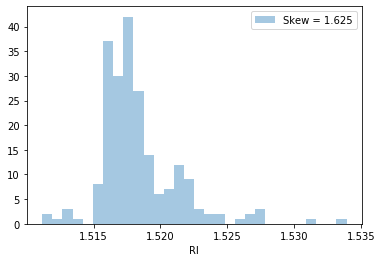

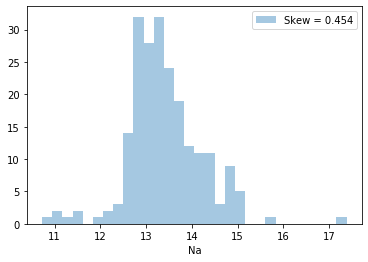

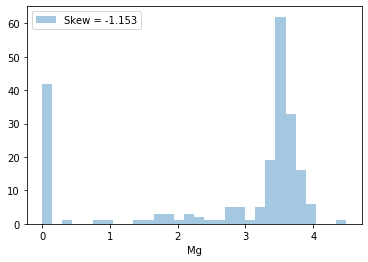

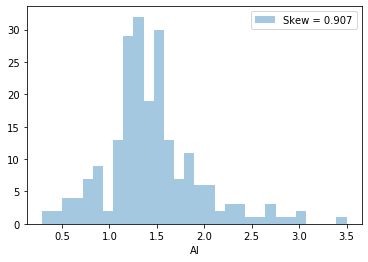

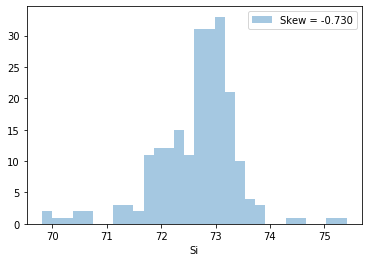

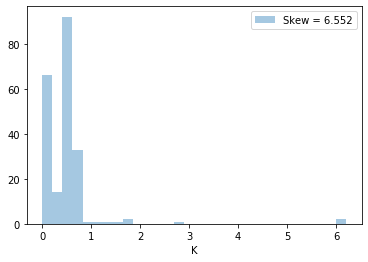

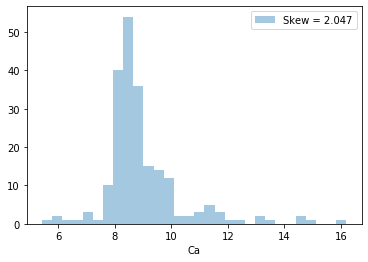

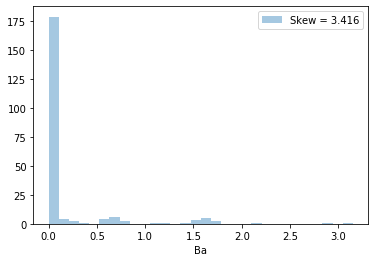

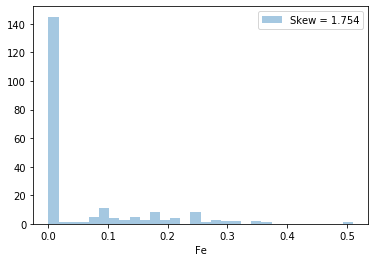

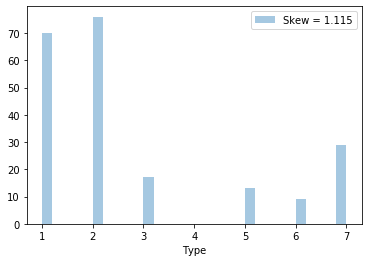

In [27]:
for feat in df :
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [28]:
df[feat].skew?

In [63]:
df[features]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [29]:
df[feat].skew

<bound method Series.skew of 0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64>

## outliers

In [30]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


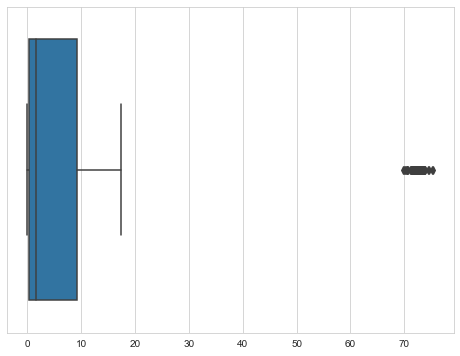

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.boxplot(X)
plt.show()

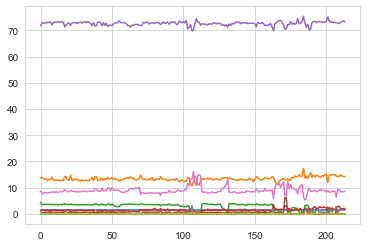

In [72]:
plt.plot(X)
plt.show()

In [51]:
df1=df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [59]:
from collections import Counter
import warnings

In [60]:
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features]))))   

The dataset contains 14 observations with more than 2 outliers


In [42]:
from sklearn.model_selection import train_test_split

In [50]:
train_test_split?

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42,stratify=y)

In [52]:
X_train[0:3]

array([[ 1.51811, 12.96   ,  2.96   ,  1.43   , 72.92   ,  0.6    ,
         8.79   ,  0.14   ,  0.     ],
       [ 1.51969, 12.64   ,  0.     ,  1.65   , 73.75   ,  0.38   ,
        11.53   ,  0.     ,  0.     ],
       [ 1.51776, 13.53   ,  3.41   ,  1.52   , 72.04   ,  0.58   ,
         8.79   ,  0.     ,  0.     ]])

In [53]:
X_train.shape

(143, 9)

In [54]:
y_train.shape

(143,)

In [55]:
X_test.shape

(71, 9)

In [56]:
y_test.shape

(71,)

In [62]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{1: 70, 2: 76, 3: 17, 5: 13, 6: 9, 7: 29}

In [63]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{1: 47, 2: 51, 3: 11, 5: 9, 6: 6, 7: 19}

In [59]:
y_test.view()

array([7, 7, 3, 5, 2, 2, 7, 1, 2, 7, 1, 2, 1, 6, 2, 2, 1, 7, 5, 7, 1, 7,
       7, 2, 3, 1, 6, 3, 1, 7, 1, 6, 2, 1, 3, 2, 5, 1, 3, 2, 7, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 3, 2, 2, 5, 2, 2, 2, 2,
       2, 1, 2, 1, 1], dtype=int64)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [64]:
y_predict=knn.predict(X_test)
y_predict

array([7, 7, 1, 7, 2, 2, 7, 2, 2, 7, 1, 3, 1, 6, 5, 2, 1, 7, 5, 7, 1, 5,
       7, 1, 1, 1, 1, 1, 2, 7, 1, 7, 5, 1, 1, 2, 5, 1, 1, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 7, 2, 2, 2, 2,
       2, 1, 2, 1, 1], dtype=int64)

In [65]:
y_test

array([7, 7, 3, 5, 2, 2, 7, 1, 2, 7, 1, 2, 1, 6, 2, 2, 1, 7, 5, 7, 1, 7,
       7, 2, 3, 1, 6, 3, 1, 7, 1, 6, 2, 1, 3, 2, 5, 1, 3, 2, 7, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 3, 2, 2, 5, 2, 2, 2, 2,
       2, 1, 2, 1, 1], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [67]:
acc=accuracy_score(y_test,y_predict)
acc

0.704225352112676

In [68]:
con=confusion_matrix(y_predict,y_test)
con

array([[20,  3,  6,  0,  1,  0],
       [ 3, 19,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  1],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  2,  1,  8]], dtype=int64)

In [54]:

q1,q3 =np.percentile(df1,[25,75]) 
iqr = q3-q1 
lower = q1-1.5*iqr
upper = q3+1.5*iqr
df1[np.logical_or(df1<lower,df1>upper)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,NaN,NaN,NaN,NaN,71.78,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,72.73,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,72.99,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,72.61,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,73.08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
209,NaN,NaN,NaN,NaN,72.61,NaN,NaN,NaN,NaN
210,NaN,NaN,NaN,NaN,73.06,NaN,NaN,NaN,NaN
211,NaN,NaN,NaN,NaN,73.42,NaN,NaN,NaN,NaN
212,NaN,NaN,NaN,NaN,73.61,NaN,NaN,NaN,NaN
